<a href="https://colab.research.google.com/github/1337Rinz/machine-learning/blob/main/lab_8_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://raw.githubusercontent.com/1337Rinz/DATA_for_machine_learning/main/Moves.csv

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
# read file
df = pd.read_csv("https://raw.githubusercontent.com/1337Rinz/DATA_for_machine_learning/main/Moves.csv")
df.shape

(5043, 27)

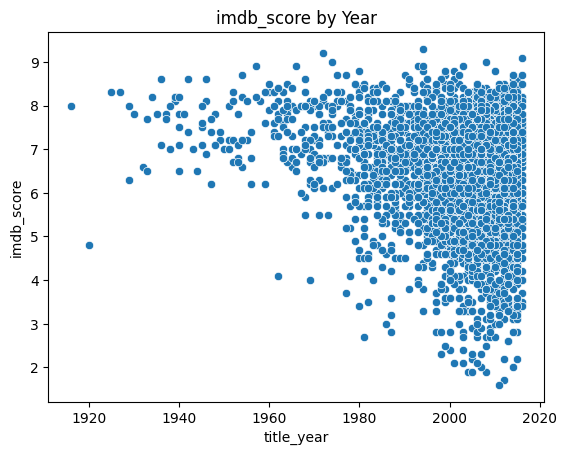

In [11]:
# plot
sns.scatterplot(x="title_year", y="imdb_score", data=df)
plt.title("imdb score qua từng năm")
plt.show()

# hồi quy đơn biến

In [19]:
# loại bỏ nan trong 2 feature title_year, imdb_score

df = df.dropna(subset=["title_year", "imdb_score"])

In [20]:
# xây dựng model hồi quy đơn biến của imbd_score qua từng năm 
from sklearn.model_selection import train_test_split

X = df[['title_year']] # Chọn cột 'title_year' làm đầu vào X
y = df['imdb_score'] # Chọn cột 'imdb_score' làm đầu ra y

# Tách dữ liệu thành tập train và tập test (train = 80%; test = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression

# Xây dựng mô hình hồi quy tuyến tính với dữ liệu huấn luyện
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# In ra hệ số và sai số của phương trình hồi quy
print('Hệ số: ', regressor.coef_)
print('Sai số: ', regressor.intercept_)

Hệ số:  [-0.01787925]
Sai số:  42.21969060366376


Hệ số của năm sản xuất là -0.0179, cho thấy rằng mỗi năm tăng lên sẽ giảm điểm IMDb khoảng 0.0179 điểm. Tuy nhiên, sai số khá lớn, khoảng 42.22 điểm, cho thấy rằng mô hình không dự đoán tốt điểm IMDb của phim dựa trên năm sản xuất.


In [23]:
import numpy as np

# Dự đoán điểm IMDB của phim có năm sản xuất là 2022
year = 2022
imdb_score = round(regressor.predict(np.array(year).reshape(-1, 1))[0], 3) # làm tròn đến số thứ 3 sau dấu float
print('Điểm IMDB dự đoán của phim có năm sản xuất {}: {}'.format(year, imdb_score))

Điểm IMDB dự đoán của phim có năm sản xuất 2022: 6.068


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# hồi quy đa biến
sử dụng budget và title_year  để dự đoán imdb_score

In [25]:
# Loại bỏ dòng dữ liệu chứa giá trị NaN
df = df.dropna()
df.shape

(3756, 27)

In [26]:
# split train/ test
X_train, X_test, y_train, y_test = train_test_split(df[['budget', 'title_year']], df['imdb_score'], test_size=0.2, random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# In ra các hệ số và sai số của mô hình
print('Hệ số: ', regressor.coef_)
print('Sai số: ', regressor.intercept_)

Hệ số:  [ 0.03708952 -0.14971442]
Sai số:  6.469340878828228


In [30]:
# Dự đoán điểm IMDB của phim có năm sản xuất là 2022 và ngân sách là 100 triệu 
year = 2022
budget = 100000000
imdb_score = regressor.predict(scaler.transform([[budget, year]]))[0]
print('Điểm IMDB dự đoán của phim có ngân sách {} USD và năm sản xuất {}: {:.3f}'.format(budget, year, imdb_score))

Điểm IMDB dự đoán của phim có ngân sách 100000000 USD và năm sản xuất 2022: 6.195


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Hồi quy logictic

phân vùng imbd_score thành 2 vùng (trên 4 điểm và dưới 4 điểm)

In [32]:
# thêm cột nhãn phân loại
df['label'] = pd.cut(df['imdb_score'], bins=[0, 4, 10], labels=['below_4', 'above_4'])

# hiển thị dữ liệu với cột nhãn phân loại mới
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,above_4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,above_4
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,above_4
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,above_4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,above_4


In [37]:
# chuyển thông tin trong cột label về số 
one_hot_scores = pd.get_dummies(df['label'])

# concat kết quả vào df gốc
df = pd.concat([df, one_hot_scores], axis=1)

In [38]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label,below_4,above_4
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,above_4,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,above_4,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,above_4,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,above_4,0,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,above_4,0,1


In [45]:
print(df['label'].value_counts())

above_4    3663
below_4      93
Name: label, dtype: int64


In [39]:
X = df[['budget']]
y = df['above_4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

chuẩn hóa dữ liệu sử dụng StandardScaler để đưa dữ liệu về dạng chuẩn hóa trung bình bằng 0 và độ lệch chuẩn bằng 1

In [40]:
from sklearn.preprocessing import StandardScaler

# fit transfỏm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

# fit model
logistic_reg = LogisticRegression(random_state=2)
logistic_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [42]:
y_pred = logistic_reg.predict(X_test)

In [43]:
# đánh  giá
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.97      1.00      0.98       728

    accuracy                           0.97       752
   macro avg       0.48      0.50      0.49       752
weighted avg       0.94      0.97      0.95       752



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


đánh giá dữ liệu thiếu cân bằng  
above_4    3663 ;
below_4      93

*mô hình bị imbalance. có thể xử lý bằng nhiều cách (ví dụ như là SMOTE). Nhưng mà em nghĩ là nên chọn cột khác và đầu ra khác để  tính toán.  *
